#**Multilinear Regression**



In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv("/content/50_Startups.csv")
data.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


#GRAPHICAL REPRESENTATION

In [ ]:
import matplotlib.pyplot as plt # mostly used for visualization purposes 
import seaborn as sns

R&D COLUMN GRAPHICAL REPRESENTATION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


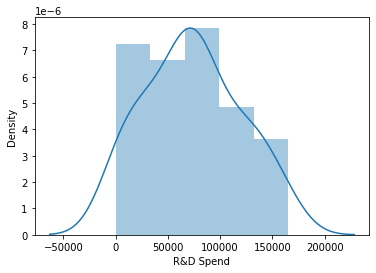

In [ ]:
sns.distplot(data['R&D Spend'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


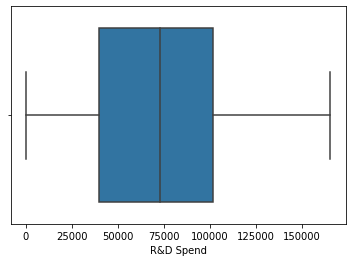

In [ ]:
sns.boxplot(data['R&D Spend'])

Administration visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


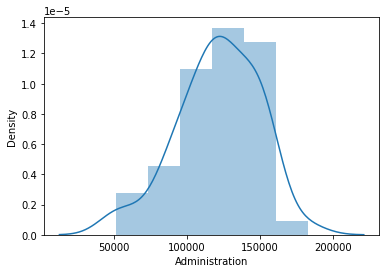

In [ ]:
sns.distplot(data['Administration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


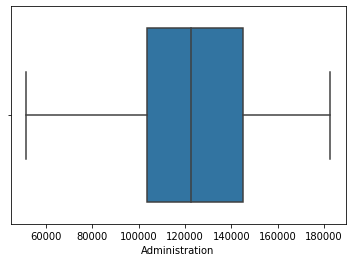

In [ ]:
sns.boxplot(data['Administration'])

Marketing Spend visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


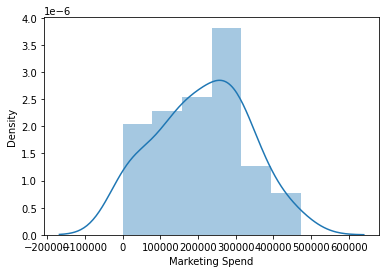

In [ ]:
sns.distplot(data["Marketing Spend"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


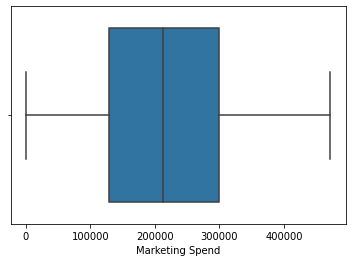

In [ ]:
sns.boxplot(data["Marketing Spend"])

Profit visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


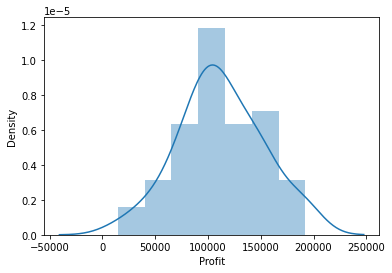

In [ ]:
sns.distplot(data['Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


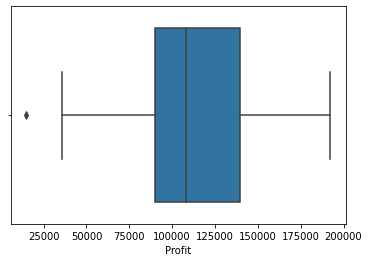

In [ ]:
sns.boxplot(data['Profit'])

In [ ]:
!pip install feature_engine
from feature_engine.outliers import Winsorizer
winsor_iqr=Winsorizer(capping_method='iqr',
                      tail="both",
                      fold=1.5,
                      variables=["Profit"])  
data["Profit"]= winsor_iqr.fit_transform(data[["Profit"]])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


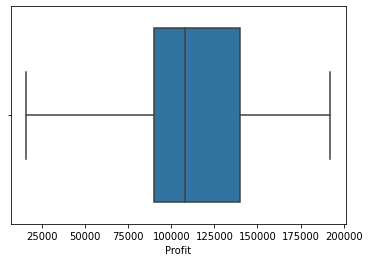

In [ ]:
sns.boxplot(data["Profit"])

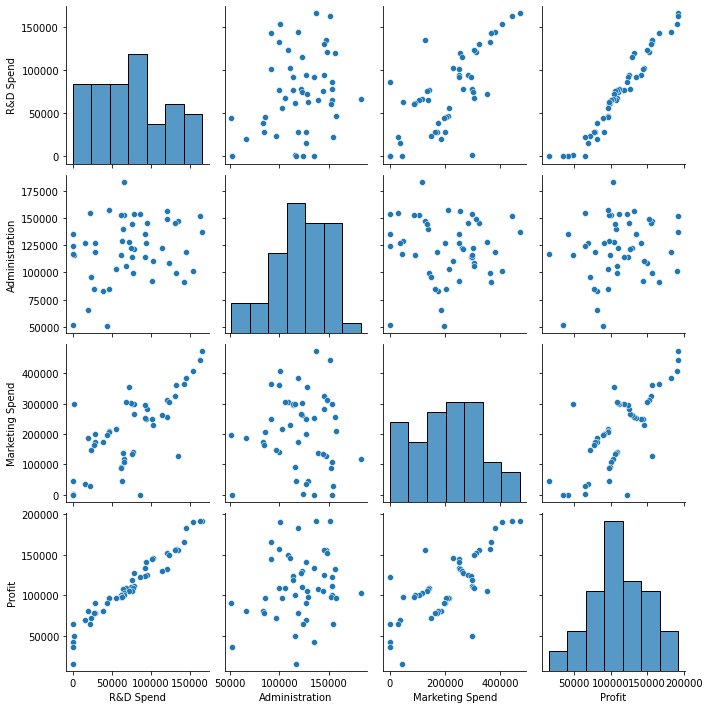

In [ ]:
sns.pairplot(data)

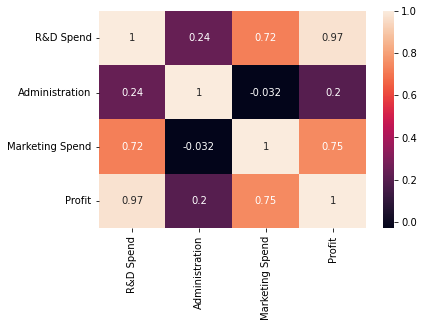

In [ ]:
sns.heatmap(data.corr(),annot=True)

###Profit and R&D are strongly correlated

#Convert state column using one hot encoding

In [ ]:
num = data.select_dtypes(include=[np.number])
cate = data.select_dtypes(exclude=[np.number])
num
cate.value_counts()

State     
California    17
New York      17
Florida       16
dtype: int64

In [ ]:
# from sklearn import preprocessing
# num = preprocessing.normalize(num)
# num=pd.DataFrame(num)
# num=num.rename(columns={0:"R&D Spend",1:"Administration",2:"Marketing Spend",3:"Profit"})
# num

In [ ]:
cate=pd.get_dummies(cate)
cate

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


#for getting out of dummy variable trap need to remove the one variable

In [ ]:
cate=cate.drop(columns=("State_California"))

In [ ]:
data1=pd.concat([cate,num],axis=1)
data1

,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,0,134615.46,147198.87,127716.82,156122.51
7,1,0,130298.13,145530.06,323876.68,155752.60
8,0,1,120542.52,148718.95,311613.29,152211.77
9,0,0,123334.88,108679.17,304981.62,149759.96


In [ ]:
data1=data1.rename(columns={"R&D Spend":"RD","Administration":"adm","Marketing Spend":"marketing","Profit":"profit","State_Florida":"sfl","State_New York":"snw"})

#Preparing the model with all the variable

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols('profit~RD+adm+marketing+sfl+snw',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     172.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           9.68e-28
Time:                        05:52:50   Log-Likelihood:                -524.95
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.021e+04   6825.548      7.357      0.000    3.65e+04     6.4e+04
RD             0.8054      0.046     17.506      0.000       0.713       0.898
adm           -0.0269      0.052     -0.519      0.606      -0.131       0.077
marketing      0.0269      0.017      1.586      0.120      -0.007       0.061
sfl          150.7092   3341.986      0.045      0.964   -6584.621    6886.040
snw          -94.0332   3228.008     -0.029      0.977   -6599.656    6411.589
==============================================================================
Omnibus:                       13.298   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.729
Skew:                          -0.887   Prob(JB):                     0.000141
Kurtosis:                       5.315   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm

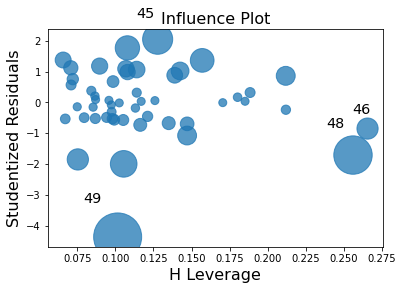

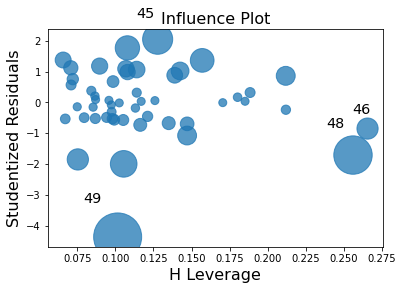

In [ ]:
sm.graphics.influence_plot(model)

In [ ]:
data1=data1.drop(data1.index[[49]])
data1

,sfl,snw,RD,adm,marketing,profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,0,134615.46,147198.87,127716.82,156122.51
7,1,0,130298.13,145530.06,323876.68,155752.60
8,0,1,120542.52,148718.95,311613.29,152211.77
9,0,0,123334.88,108679.17,304981.62,149759.96


In [ ]:
model=smf.ols('profit~RD+marketing+sfl+adm+snw',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.51e-29
Time:                        05:52:52   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
RD             0.7836      0.039     20.056      0.000       0.705       0.862
marketing      0.0258      0.014      1.804      0.078      -0.003       0.055
sfl        -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
adm           -0.0220      0.044     -0.505      0.616      -0.110       0.066
snw        -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#WE CAN SEE FACTOR ADMINISTRATION IS NOT AFFECTING THE DATA AND HAVING p VALUE HEIGHER THAN 0.05

In [ ]:
data2=data1.drop(columns=("snw"))
data2

,sfl,RD,adm,marketing,profit
0,0,165349.20,136897.80,471784.10,192261.83
1,0,162597.70,151377.59,443898.53,191792.06
2,1,153441.51,101145.55,407934.54,191050.39
3,0,144372.41,118671.85,383199.62,182901.99
4,1,142107.34,91391.77,366168.42,166187.94
5,0,131876.90,99814.71,362861.36,156991.12
6,0,134615.46,147198.87,127716.82,156122.51
7,1,130298.13,145530.06,323876.68,155752.60
8,0,120542.52,148718.95,311613.29,152211.77
9,0,123334.88,108679.17,304981.62,149759.96


#Creating model again

In [ ]:
model1=smf.ols('profit~RD+marketing+sfl+adm',data=data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     273.7
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.82e-30
Time:                        05:52:52   Log-Likelihood:                -506.25
No. Observations:                  49   AIC:                             1023.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.243e+04   5606.120      9.352      0.000    4.11e+04    6.37e+04
RD             0.7823      0.039     20.159      0.000       0.704       0.860
marketing      0.0258      0.014      1.816      0.076      -0.003       0.055
sfl         -548.0172   2441.490     -0.224      0.823   -5468.517    4372.483
adm           -0.0217      0.043     -0.501      0.619      -0.109       0.066
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.183
Skew:                          -0.068   Prob(JB):                        0.913
Kurtosis:                       2.733   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

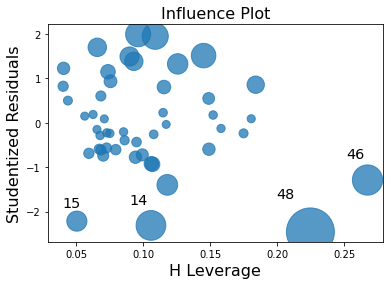

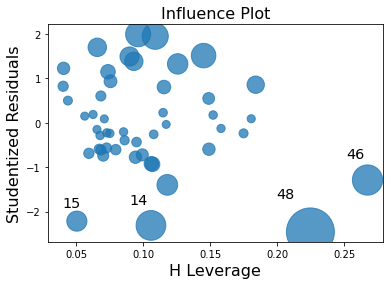

In [ ]:
sm.graphics.influence_plot(model1)

#remove column Marketing 

In [ ]:
data3=data2.drop(columns=("sfl"))
data3

,RD,adm,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


#Create model again

In [ ]:
model2=smf.ols('profit~RD+adm+marketing',data=data3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        05:52:52   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
adm           -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

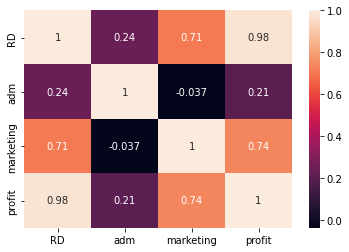

In [ ]:
sns.heatmap(data3.corr(),annot=True)

In [ ]:
data4=data3.drop(columns=("adm"))
data4

,RD,marketing,profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
model3=smf.ols('profit~RD+marketing',data=data4).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.74e-33
Time:                        05:52:53   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RD             0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data5=data4.drop(columns=("marketing"))
data5

,RD,profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


In [ ]:
model4=smf.ols('profit~RD',data=data5).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.56e-34
Time:                        05:52:53   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RD             0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Final model

In [ ]:
pred=model4.predict(data1)
pred

0     188606.573993
1     186328.768947
2     178748.897683
3     171241.123108
4     169366.004854
5     160896.825187
6     163163.917967
7     159589.854344
8     151513.758511
9     153825.389148
10    136091.540653
11    135064.090390
12    129427.973693
13    127878.784795
14    151017.649840
15    146531.056868
16    116306.160945
17    130084.791175
18    127677.428982
19    123265.482450
20    114849.781324
21    116617.727257
22    112979.439714
23    107629.905081
24    115503.900044
25    105255.805548
26    114084.036498
27    111417.336494
28    106403.863994
29    106034.613708
30    103045.279155
31    102334.908627
32    104216.161184
33     97663.872637
34     90157.108028
35     89815.996064
36     75452.736105
37     88206.614834
38     68470.582739
39     83644.017762
40     75527.713682
41     74814.602999
42     71294.630519
43     64559.976835
44     70083.341562
45     52551.726392
46     52812.686772
47     51723.694794
48     52172.426114
dtype: float64

#Q-Qplot

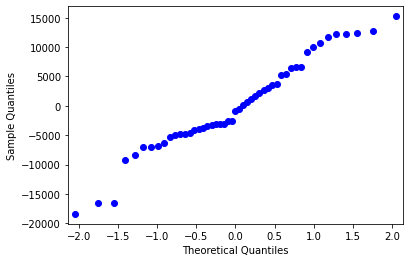

In [ ]:
res = model4.resid
sm.qqplot(res)
plt.show()

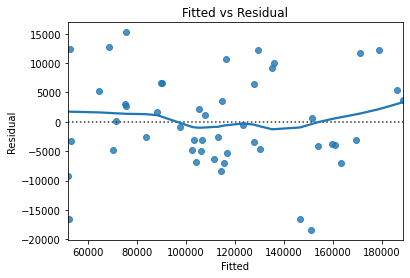

In [ ]:
sns.residplot(x = pred, y = data1.profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# Splitting the data into train and test data 

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data5, test_size = 0.3,random_state=1) 
train

,RD,profit
41,27892.92,77798.83
36,28663.76,90708.19
26,75328.87,105733.54
22,73994.56,110352.25
13,91992.39,134307.35
40,28754.33,78239.91
17,94657.16,125370.37
44,22177.74,65200.33
24,77044.01,108552.04
23,67532.53,108733.99


In [ ]:
test

,RD,profit
27,72107.60,105008.31
34,46426.07,96712.80
39,38558.51,81005.76
48,542.05,35673.41
2,153441.51,191050.39
3,144372.41,182901.99
42,23640.93,71498.49
29,65605.48,101004.64
45,1000.23,64926.08
30,61994.48,99937.59


In [ ]:
finalmodel=smf.ols('profit~RD',data=train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     734.4
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.22e-23
Time:                        05:52:53   Log-Likelihood:                -351.11
No. Observations:                  34   AIC:                             706.2
Df Residuals:                      32   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.26e+04   2777.651     18.937      0.000    4.69e+04    5.83e+04
RD             0.8106      0.030     27.100      0.000       0.750       0.872
==============================================================================
Omnibus:                        0.138   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.069
Skew:                          -0.087   Prob(JB):                        0.966
Kurtosis:                       2.863   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Prediction on test data

In [ ]:
test

,RD,profit
27,72107.60,105008.31
34,46426.07,96712.80
39,38558.51,81005.76
48,542.05,35673.41
2,153441.51,191050.39
3,144372.41,182901.99
42,23640.93,71498.49
29,65605.48,101004.64
45,1000.23,64926.08
30,61994.48,99937.59


In [ ]:
test1=test[["RD"]]
test1

,RD
27,72107.60
34,46426.07
39,38558.51
48,542.05
2,153441.51
3,144372.41
42,23640.93
29,65605.48
45,1000.23
30,61994.48


In [ ]:
# test2=test1.iloc[0:1,:]
# test2

In [ ]:
# a ={"RD":[14456]}
# test2=pd.DataFrame(a)
# test2

In [ ]:
test_pred = finalmodel.predict(test)
test_pred

27    111051.765850
34     90233.724598
39     83856.098785
48     53039.078439
2     176982.911446
3     169631.289564
42     71763.563963
29    105780.997232
45     53410.489727
30    102853.837247
31    102158.241572
38     68998.252985
21    116143.994732
35     89899.707353
19    122653.484603
dtype: float64

# test residual values 

In [ ]:
test_resid = test_pred -test.profit
test_resid

27     6043.455850
34    -6479.075402
39     2850.338785
48    17365.668439
2    -14067.478554
3    -13270.700436
42      265.073963
29     4776.357232
45   -11515.590273
30     2916.247247
31     4674.681572
38   -12230.807015
21     4830.974732
35    -6579.802647
19     -123.375397
dtype: float64

# RMSE value for test data

In [ ]:
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

8810.175519869375

# train_data prediction

In [ ]:
train_pred =finalmodel.predict(train)
train_pred

41     75210.325243
36     75835.185947
26    113663.001697
22    112581.379199
13    127170.835800
40     75908.604081
17    129330.959897
44     70577.468361
24    115053.333787
23    107343.108461
4     167795.171517
32    104000.366336
14    149828.440247
10    135212.776201
28    106142.567556
47     52599.680192
33     97584.357520
18    126973.667946
20    114412.819951
25    105018.387346
6     161722.080588
7     158222.353194
46     53666.022445
1     184405.130493
16    115838.908625
0     186635.559930
15    145435.163020
5     159502.140613
11    134206.695670
9     152577.781950
8     150314.230453
12    128687.803429
43     65168.982986
37     88323.799319
dtype: float64

# train residual values

In [ ]:
train_resid  = train_pred - train.profit
train_resid

41    -2588.504757
36   -14873.004053
26     7929.461697
22     2229.129199
13    -7136.514200
40    -2331.305919
17     3960.589897
44     5377.138361
24     6501.293787
23    -1390.881539
4      1607.231517
32     6572.526336
14    17225.790247
10   -10909.173799
28     2860.187556
47    10039.950192
33      805.437520
18     2706.767946
20    -4061.210049
25    -2385.952654
6      5599.570588
7      2469.753194
46     4175.272445
1     -7386.929507
16   -11154.021375
0     -5626.270070
15    15518.123020
5      2511.020613
11   -10052.704330
9      2817.821950
8     -1897.539547
12   -12897.716571
43    -4589.997014
37    -1625.340681
dtype: float64

# RMSE value for train data 

In [ ]:
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

7390.131720421855

In [ ]:
d1 = {'Variables':['TRAIN RMSE','TEST RMSE'], 'RMSE':[train_rmse,test_rmse]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,RMSE
0,TRAIN RMSE,7390.13172
1,TEST RMSE,8810.17552


In [ ]:
import pickle

In [ ]:
with open('finalmodel.pkl','wb') as f:
  pickle.dump(finalmodel,f)